<a href="https://colab.research.google.com/github/raihann63/Codealpha_Handwritten-Character-Recognition/blob/main/CodeAlpha_Handwritten_Character_Recognition_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 0: Imports + reproducibility
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


import warnings
warnings.filterwarnings("ignore")

# Optional (for confusion matrix visualization)
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# STEP 1: Load MNIST (digits)

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

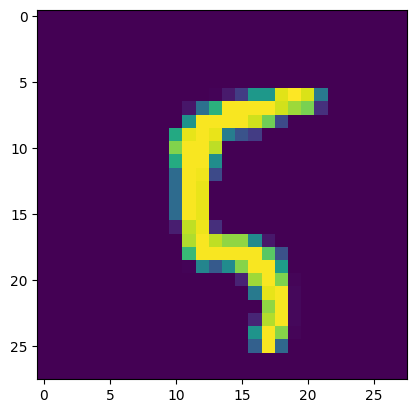

In [ ]:
plt.imshow(xtrain[100])

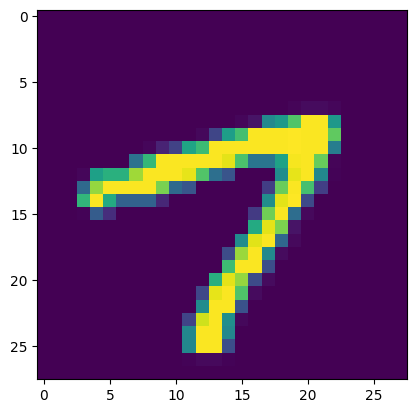

In [ ]:
plt.imshow(xtrain[101])

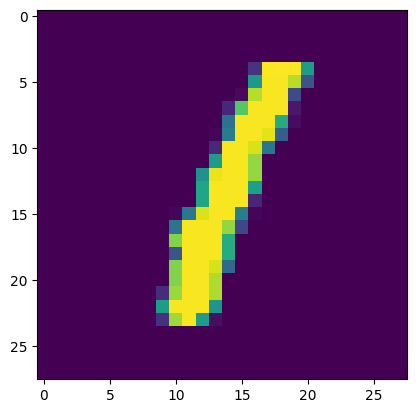

In [ ]:
plt.imshow(xtrain[105])

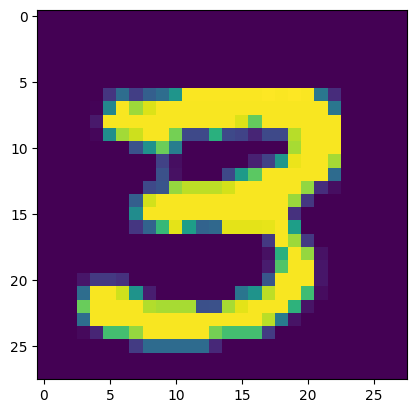

In [ ]:
plt.imshow(xtrain[111])

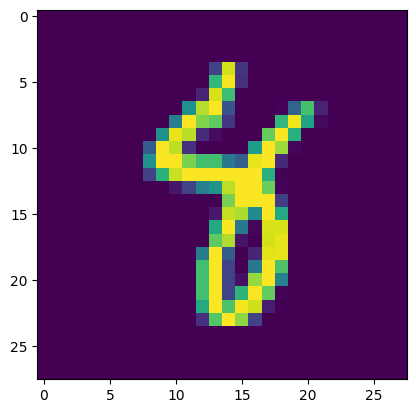

In [ ]:
plt.imshow(xtrain[160])

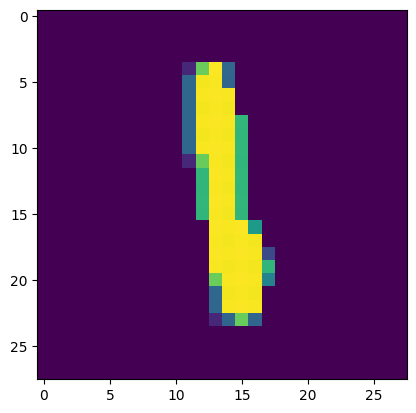

In [ ]:
plt.imshow(xtrain[200])

In [ ]:
# STEP 2: Normalize pixel values (0-1) and reshape for CNN
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [ ]:
#xtest[20]

In [ ]:
# One-hot encode labels (since we'll use categorical_crossentropy below)
num_classes = 10
y_train = keras.utils.to_categorical(ytrain, num_classes)
y_test  = keras.utils.to_categorical(ytest, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
# STEP 3: Build CNN model (simple but effective)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
# reshape to (N, 28, 28, 1) for CNN
x_train_cnn = xtrain.reshape(-1, 28, 28, 1)
x_test_cnn  = xtest.reshape(-1, 28, 28, 1)


In [ ]:
cnn_model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)), #cnn er feature extraction

    # Now ANN
    Flatten(), #1D
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])

In [ ]:
# STEP 4: Compile
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# STEP 5: Train
history = cnn_model.fit(x_train_cnn, y_train,
                        epochs=8,           # Colab: start with 5-10
                        batch_size=128,
                        validation_data=(x_test_cnn, y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 104ms/step - accuracy: 0.8576 - loss: 0.4826 - val_accuracy: 0.9782 - val_loss: 0.0643
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9810 - loss: 0.0621 - val_accuracy: 0.9862 - val_loss: 0.0419
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.9875 - loss: 0.0412 - val_accuracy: 0.9894 - val_loss: 0.0324
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9897 - val_loss: 0.0299
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9892 - val_loss: 0.0299
Epoch 6/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9903 - val_loss: 0.0276
Epoch 7/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 8/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - accuracy: 0.9966 - loss: 0.0115 - 

In [ ]:
# STEP 6: Evaluate
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9873 - loss: 0.0374
CNN Test Accuracy: 0.9908000230789185


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


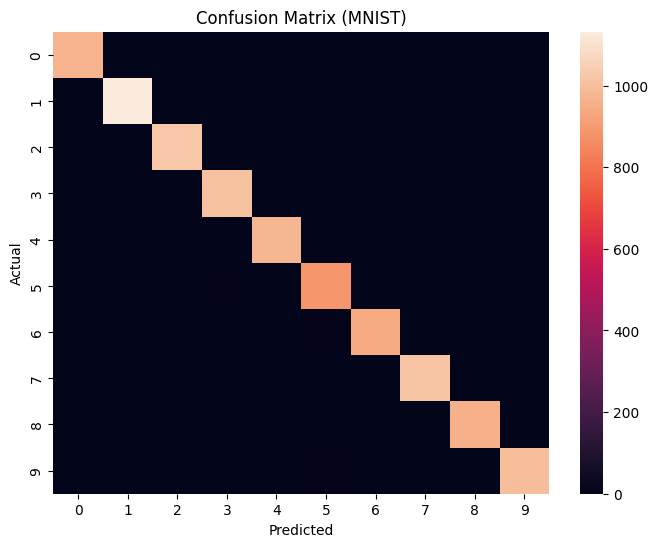

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# STEP 7: Confusion matrix + classification report (optional, helpful to analyze errors)
# predict classes
y_pred_proba = cnn_model.predict(x_test_cnn)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt='d')
plt.title("Confusion Matrix (MNIST)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))

#*visualize_predictions*

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(x_data, y_true, y_pred, start_idx=0, num_images=5):
    plt.figure(figsize=(12,6))
    for i in range(num_images):
        idx = start_idx + i
        plt.subplot(3, 4, i+1)
        plt.imshow(x_data[idx].reshape(28,28), cmap='gray')
        plt.title(f"T:{y_true[idx]}\nP:{y_pred[idx]}")
        plt.axis('off')
    plt.show()

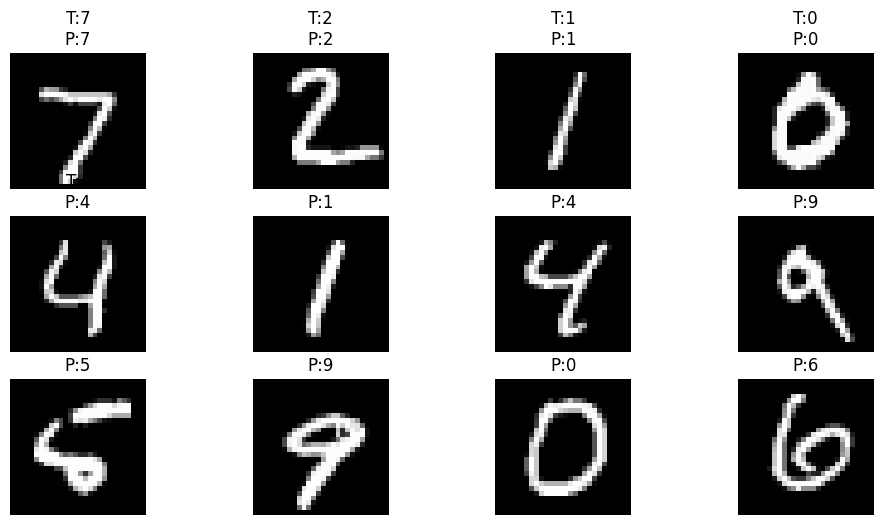

In [ ]:
visualize_predictions(x_test_cnn, y_true, y_pred, start_idx=0, num_images=12)

In [ ]:
def visualize_digit(start_idx, x_data, y_true, y_pred, num_images=5):

    plt.figure(figsize=(12,4))
    for i in range(num_images):
        idx = start_idx + i
        plt.subplot(1, num_images, i+1)
        plt.imshow(x_data[idx].reshape(28,28), cmap='gray')
        plt.title(f"T:{y_true[idx]}\nP:{y_pred[idx]}")
        plt.axis('off')
    plt.show()

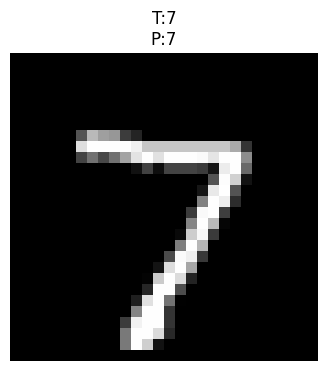

In [ ]:
label_to_show = 7
indices = np.where(y_true == label_to_show)[0]
visualize_digit(indices[0], x_test_cnn, y_true, y_pred, num_images=1)

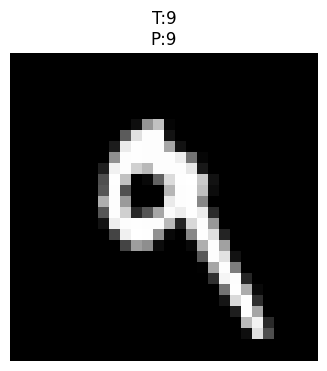

In [ ]:
label_to_show = 9
indices = np.where(y_true == label_to_show)[0]
visualize_digit(indices[0], x_test_cnn, y_true, y_pred, num_images=1)

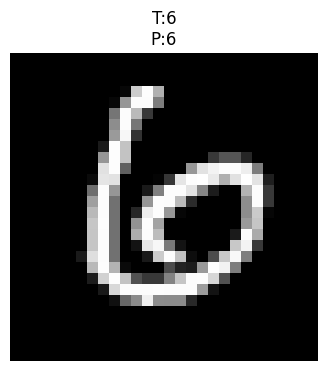

In [ ]:
label_to_show = 6
indices = np.where(y_true == label_to_show)[0]
visualize_digit(indices[0], x_test_cnn, y_true, y_pred, num_images=1)